In [122]:
'''Midlatitude Summer'''
import importlib
import final_forward_attenuation
importlib.reload(final_forward_attenuation)
from final_forward_attenuation import run_simulation, default_species, convert_atm, convert_vmr, plot_npy, plot_histogram

In [61]:
Ptotal = convert_atm(1.013e6, "gcms2") 
ppVs = [1.876E-02, 3.300E-04, 3.017E-08, 3.200E-07, 1.500E-07, 1.700E-06, 0.781] #porque no usamos N2?
o2 = convert_vmr(2.090E+05)
vmrs = ppVs + [o2]
print(vmrs)

[0.01876, 0.00033, 3.017e-08, 3.2e-07, 1.5e-07, 1.7e-06, 0.781, 0.209]


In [62]:
print(f'Total pressure (atm): {Ptotal}')

Total pressure (atm): 0.999753269183321


c:\Users\PC\Documents\GitHub\Stand-off
DEBUG: H2O qfile=TIPS/q1.txt exists=True


c:\Users\PC\Documents\GitHub\Stand-off\final_forward_attenuation.py:53: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  if df.shape[1] < 2:


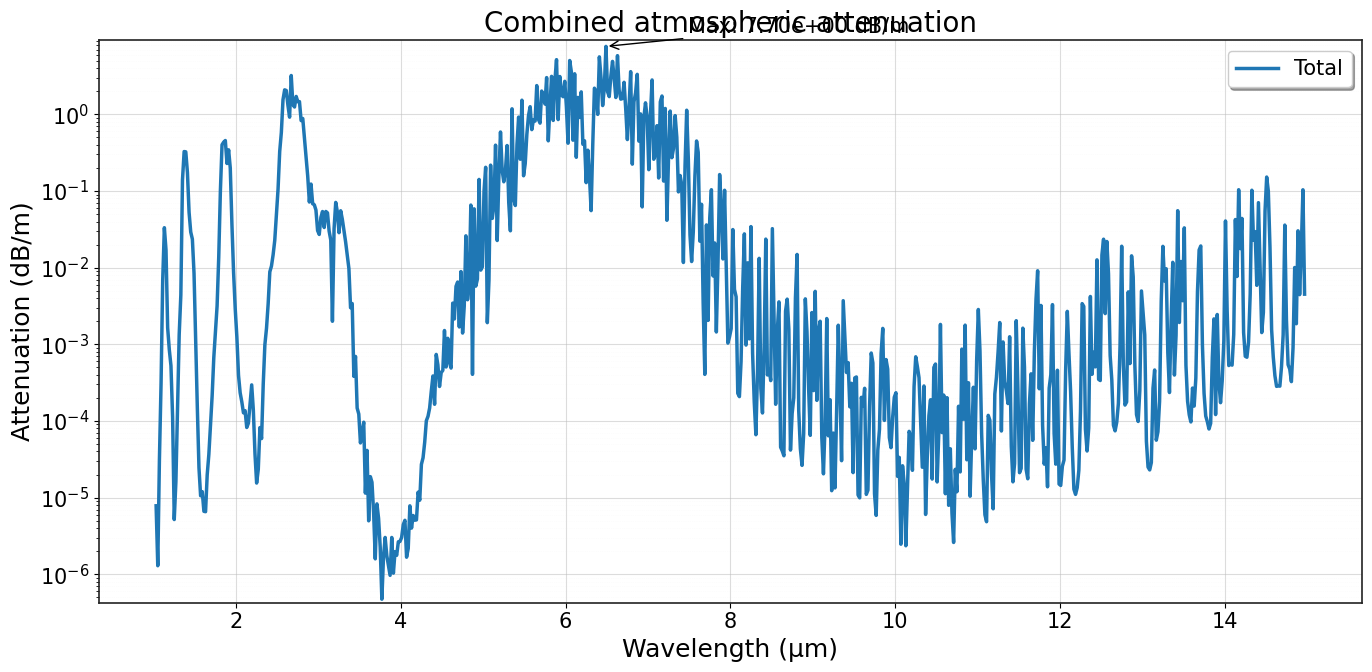

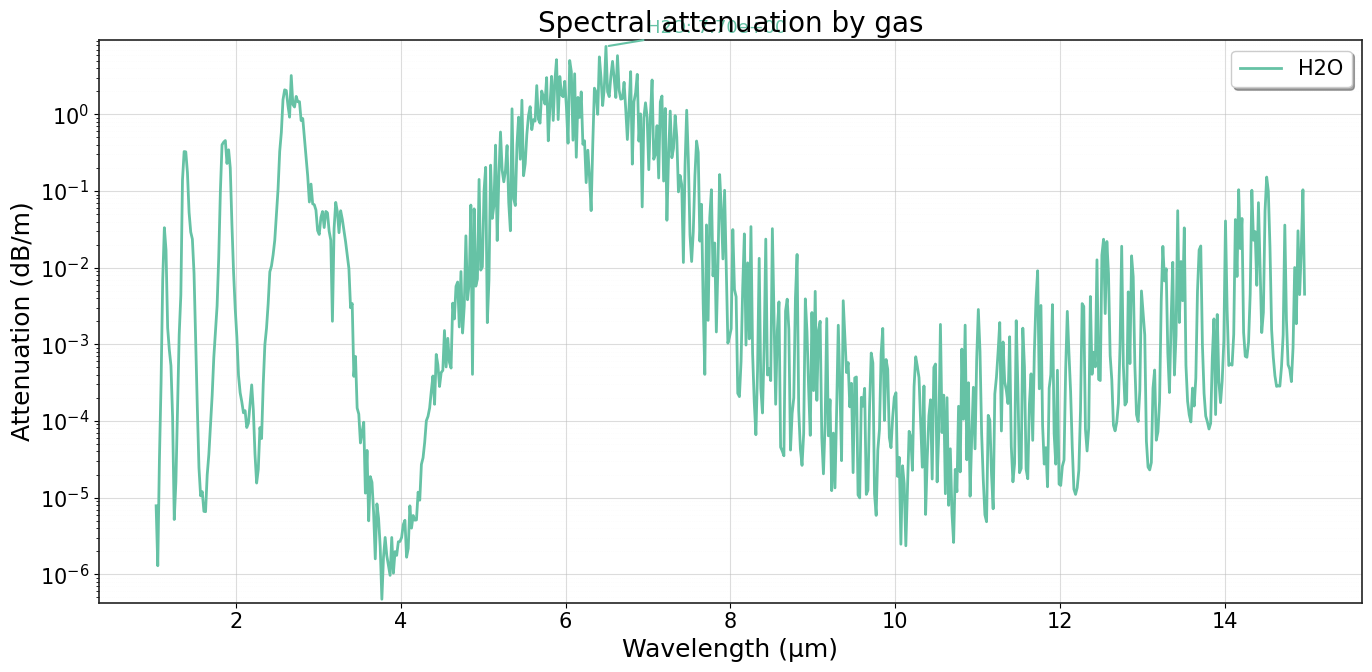

In [10]:
'''Comprobando con la firma de H2O'''
sp = default_species()
for s in sp:
     if s.name == 'H2O': s.Pmol = 0.0187553713298791
     if s.name == 'CO2': s.Pmol = 0.0003299185788304959
     if s.name == 'O3': s.Pmol = 3.016255613126079e-08
     if s.name == 'N2O': s.Pmol = 3.1992104613866274e-07
     if s.name == 'CO': s.Pmol = 1.4996299037749815e-07
     if s.name == 'CH4': s.Pmol = 1.6995805576116458e-06
     if s.name == 'O2': s.Pmol = 0.2089484332593141

h2o = [s for s in sp if s.name == "H2O"]

import os
print(os.getcwd())

res = run_simulation(
    parfile='PARS/7Mols_1Iso.par',
    species=h2o,
    nu_min=666.67, nu_max=10000.0, dnu=0.01,
    tileW=20.0, guard=5.0,
    temp_K=296.0, L_m=1.0, pres=Ptotal,
    delta_um=0.020,
    save_csv=True, outdir='out', make_plots=True, att=True
)

lambda_um = res['lambda_centers']
Tprod = res['T_prod_samp']
Th2o  = res['T_each_samp'][0]

c:\Users\PC\Documents\GitHub\Stand-off
DEBUG: CH4 qfile=TIPS/q32.txt exists=True


c:\Users\PC\Documents\GitHub\Stand-off\final_forward_attenuation.py:47: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(qfile, header=None, delim_whitespace=True, comment='#')


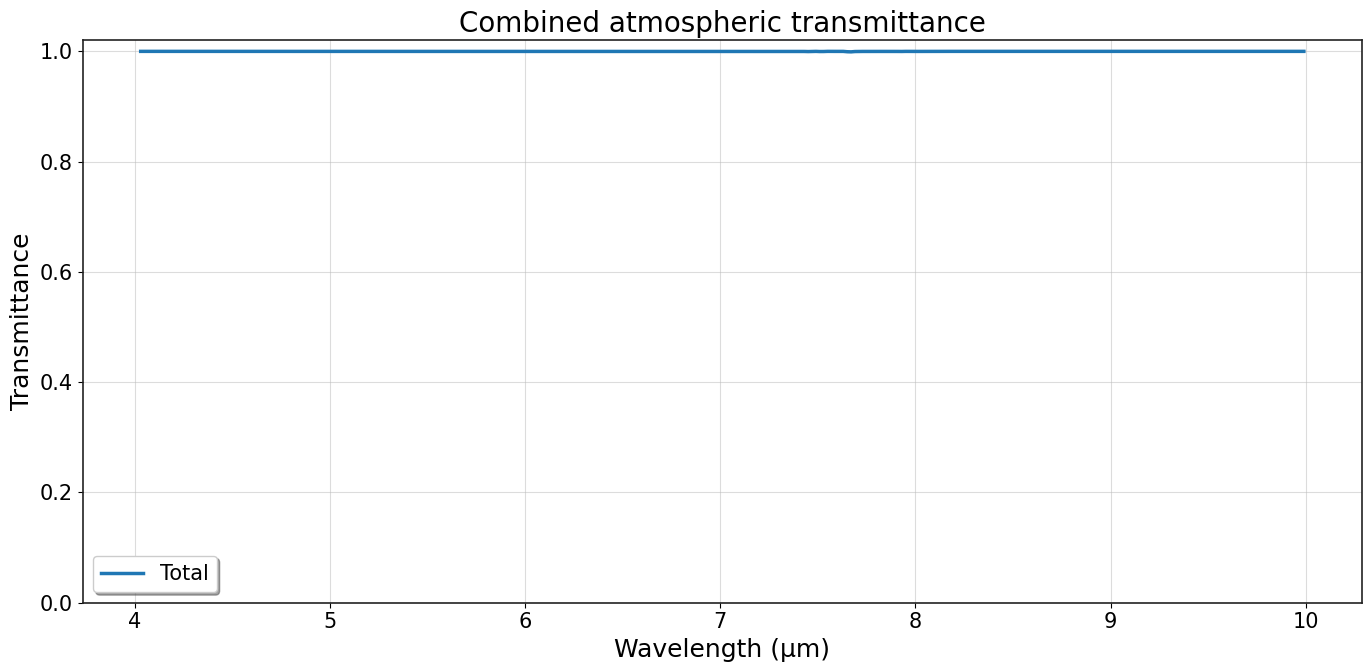

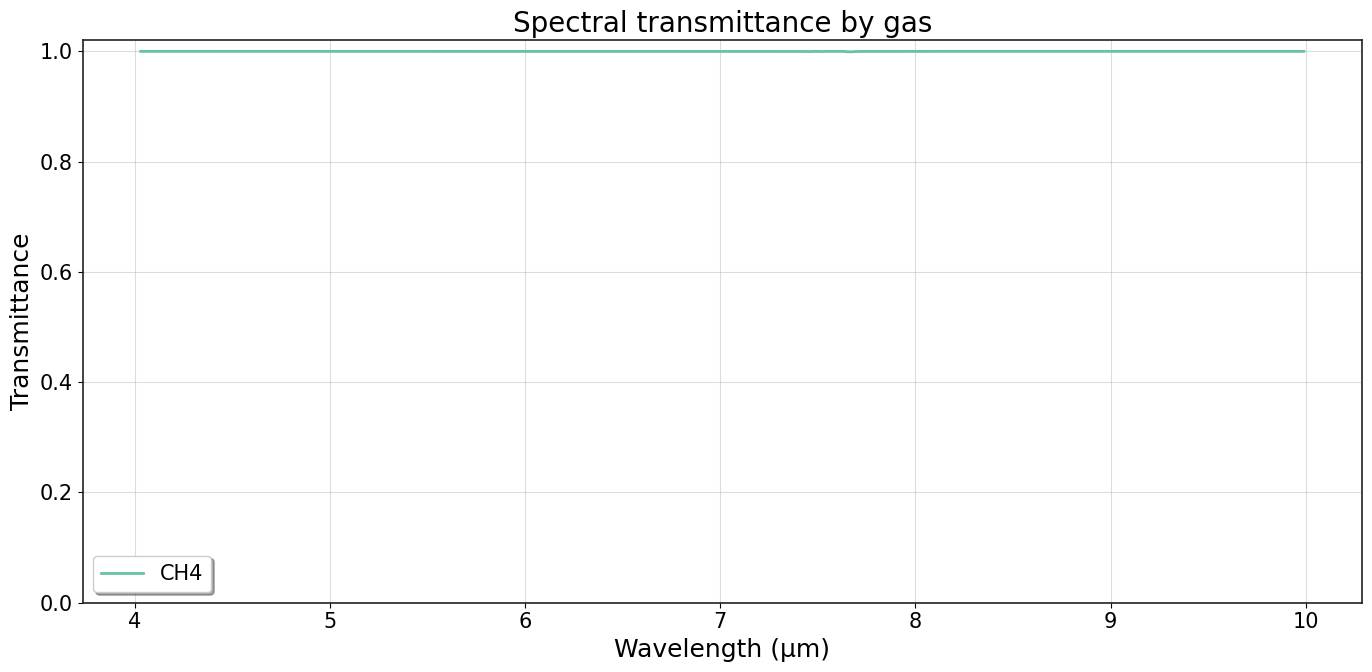

In [ ]:
'''CH4'''
vmr = 1.7e-06 
Ptotal = convert_atm(1013, "mbar")
T = 288.0
Pch4 = vmr * Ptotal


sp = default_species()
for s in sp:
     if s.name == 'H2O': s.Pmol = 0
     if s.name == 'CO2': s.Pmol = 0
     if s.name == 'O3': s.Pmol = 0
     if s.name == 'N2O': s.Pmol = 0
     if s.name == 'CO': s.Pmol = 0
     if s.name == 'CH4': s.Pmol = Pch4
     if s.name == 'O2': s.Pmol = 0

ch4 = [s for s in sp if s.name == "CH4"]

import os
print(os.getcwd())

res = run_simulation(
    parfile='7Mols_1Iso.par',
    species=ch4,
    nu_min=1000, nu_max=2500, dnu=0.01,
    tileW=20.0, guard=5.0,
    temp_K=T, L_m=1.0, pres=Ptotal,
    delta_um=0.020,
    save_csv=True, outdir='OUT', make_plots=True, 
    att=False, transmission_npy_name='ch4_transmission.npy'
)

lambda_um = res['lambda_centers']
Tprod = res['T_prod_samp']
Th2o  = res['T_each_samp'][0]

c:\Users\PC\Documents\GitHub\Stand-off
DEBUG: CH4 qfile=TIPS/q32.txt exists=True


c:\Users\PC\Documents\GitHub\Stand-off\final_forward_attenuation.py:53: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(qfile, header=None, delim_whitespace=True, comment='#')


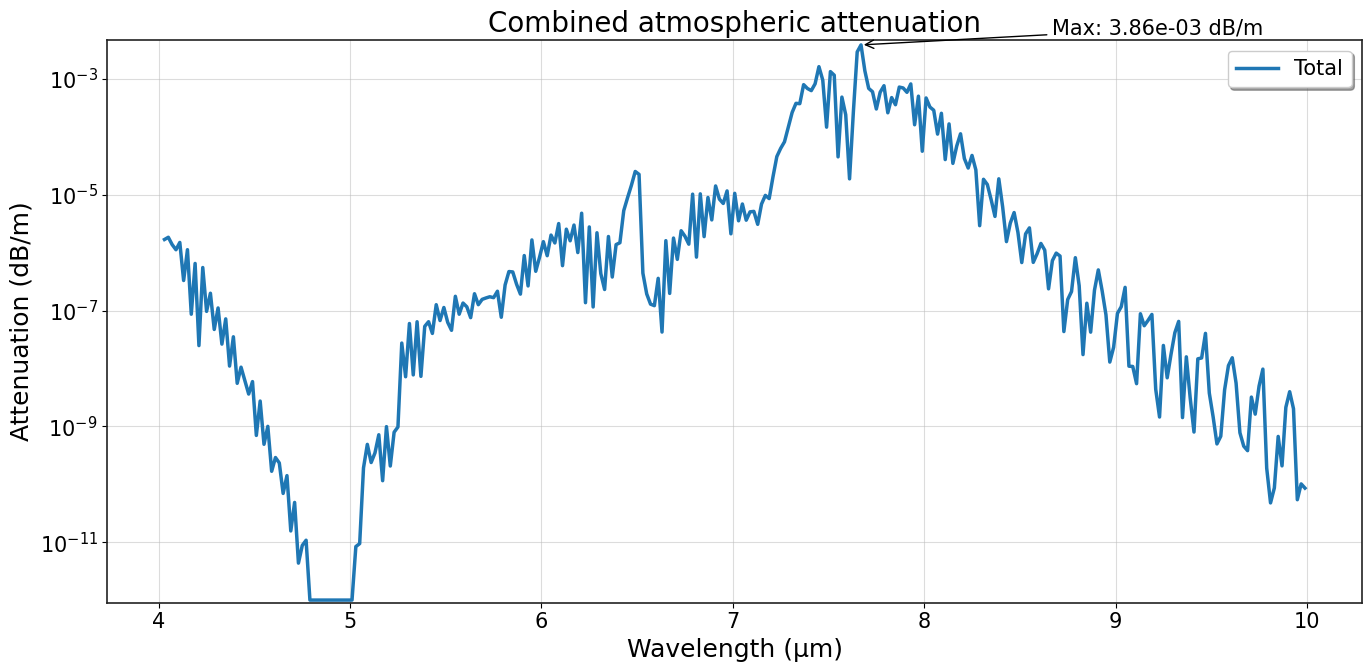

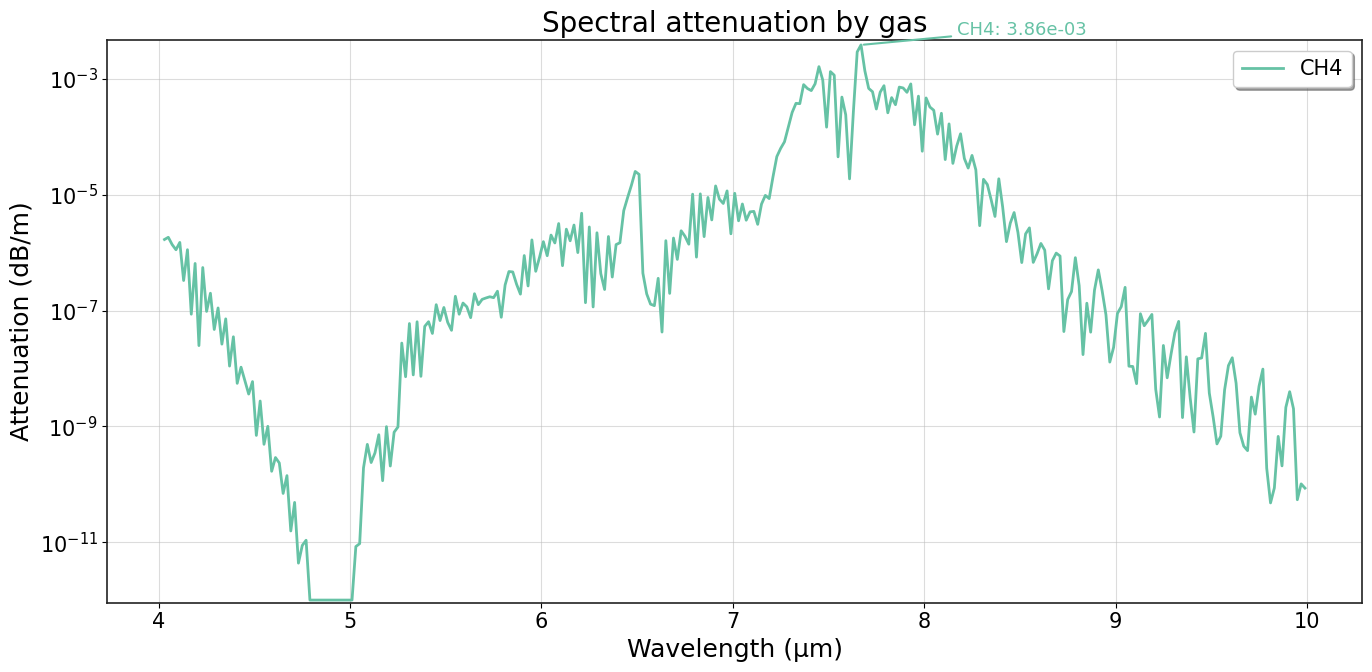

In [78]:
'''CH4'''
vmr = 1.7e-06 
Ptotal = convert_atm(1013, "mbar")
T = 288.0
Pch4 = vmr * Ptotal


sp = default_species()
for s in sp:
     if s.name == 'H2O': s.Pmol = 0
     if s.name == 'CO2': s.Pmol = 0
     if s.name == 'O3': s.Pmol = 0
     if s.name == 'N2O': s.Pmol = 0
     if s.name == 'CO': s.Pmol = 0
     if s.name == 'CH4': s.Pmol = Pch4
     if s.name == 'O2': s.Pmol = 0

ch4 = [s for s in sp if s.name == "CH4"]

import os
print(os.getcwd())

res = run_simulation(
    parfile='PARS/7Mols_1Iso.par',
    species=ch4,
    nu_min=1000, nu_max=2500, dnu=0.01,
    tileW=20.0, guard=5.0,
    temp_K=T, L_m=1.0, pres=Ptotal,
    delta_um=0.020,
    save_csv=True, outdir='OUT', make_plots=True, att = True
)

lambda_um = res['lambda_centers']
Tprod = res['T_prod_samp']
Th2o  = res['T_each_samp'][0]

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def txt_to_npy(txt_path, out_path):
    waves = []
    trans = []

    with open(txt_path, "r") as f:
        for line in f:
            if not line.strip():
                continue
            try:
                w, t = map(float, line.split())
                waves.append(w)
                trans.append(t)
            except:
                continue
            
    wave = np.array(waves)
    tr   = np.array(trans)
    np.save(out_path, [wave, tr])
    print(f"Guardado como arreglo numpy en: {out_path}.npy")

In [31]:
txt_file = "GT_PROFE_TXT/CH4_4-10.txt"
out_file = "GT_PROFE/CH4_4-10"
txt_to_npy(txt_file, out_file)

Guardado como arreglo numpy en: GT_PROFE/CH4_4-10.npy


In [92]:
wave, tr = np.load("GT_PROFE/CH4_4-10.npy")

In [132]:
def plot_npy(wave, tr, name):
    plt.figure(figsize=(16, 7))
    plt.plot(wave, tr, lw=2.5)

    plt.gca().ticklabel_format(useOffset=False)
    e = 0.0001
    plt.ylim(tr.min()-e, tr.max()+e)

    plt.xlabel("Wavelength (microns)")
    plt.ylabel("Transmittance")
    plt.title("Spectral Transmittance of "+ name)
    plt.grid(True)
    plt.show()

<Axes: title={'center': 'Histogram wavelengths of CH4_4-10'}, xlabel='Wavelength (µm)', ylabel='Frequency'>

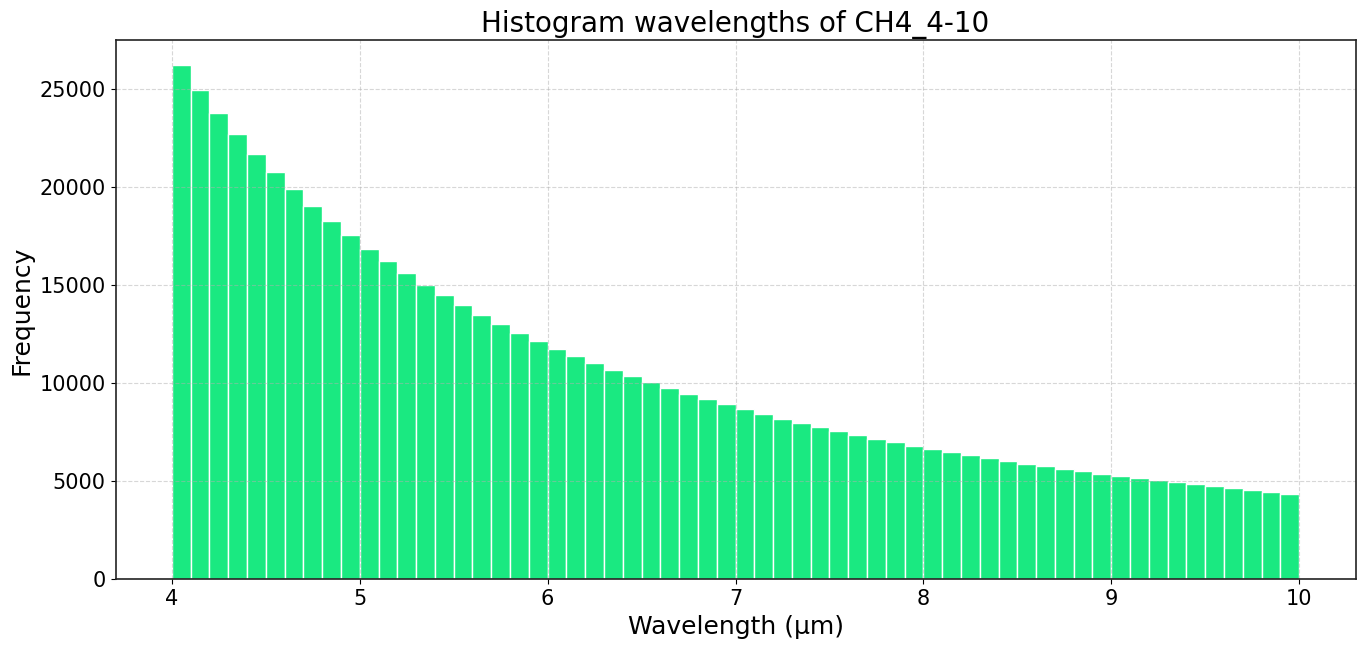

In [131]:
def plot_histogram(wave, name, bins=60, range=None, ax=None):
    if ax is None:
        fig, ax = plt.subplots(figsize=(16, 7))
    else:
        fig = ax.figure
    ax.hist(wave, bins=bins, range=range, color="#1ae981", edgecolor='white')
    ax.set_xlabel('Wavelength (µm)')
    ax.set_ylabel('Frequency')
    ax.set_title('Histogram wavelengths of ' + name)
    ax.grid(True, linestyle='--', alpha=0.5)
    return ax

plot_histogram(wave, name = 'CH4_4-10', bins=60)

c:\Users\PC\Documents\GitHub\Stand-off
DEBUG: H2O qfile=TIPS/q1.txt exists=True


c:\Users\PC\Documents\GitHub\Stand-off\final_forward_attenuation.py:53: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(qfile, header=None, delim_whitespace=True, comment='#')


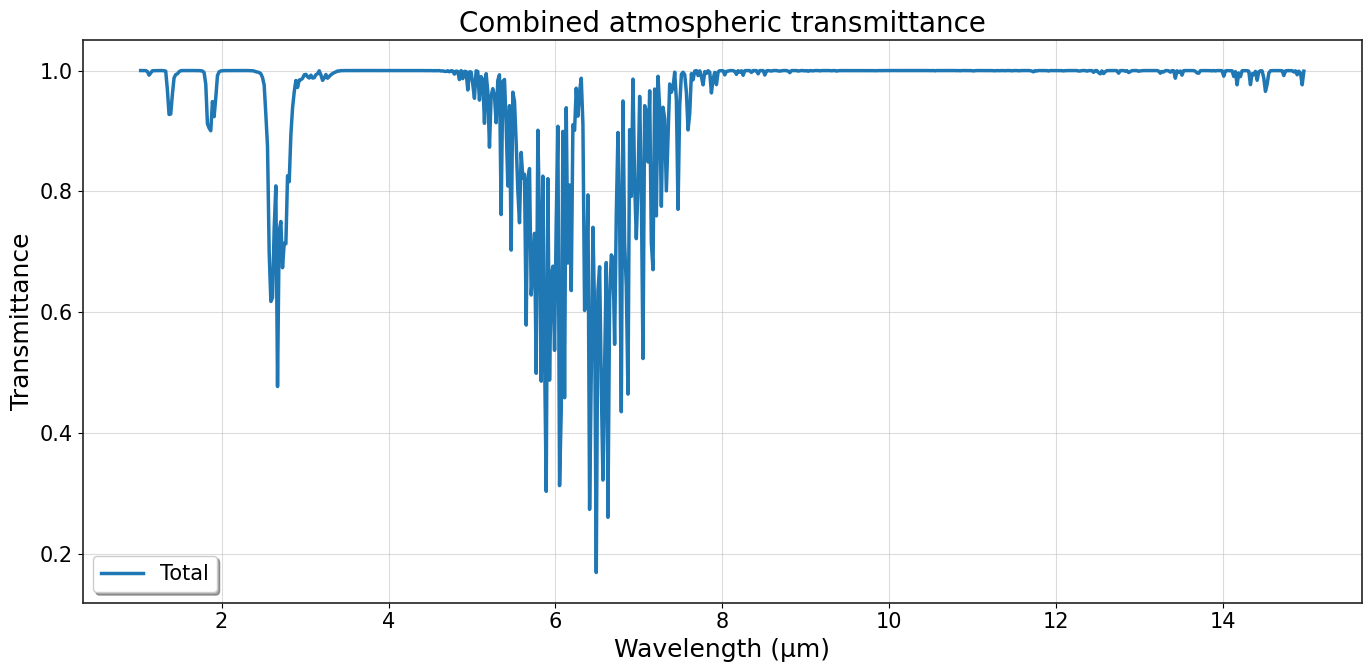

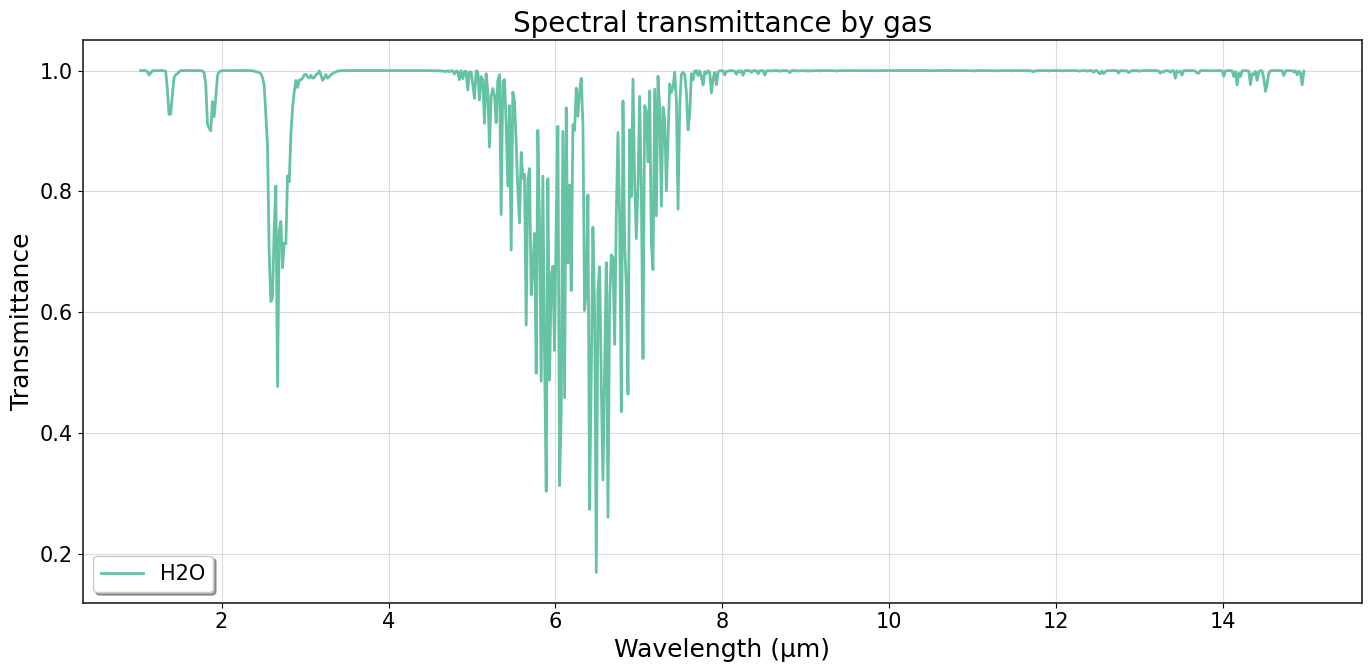

In [87]:
'''Comprobando con la firma de H2O'''
sp = default_species()
for s in sp:
     if s.name == 'H2O': s.Pmol = 0.0187553713298791
     if s.name == 'CO2': s.Pmol = 0.0003299185788304959
     if s.name == 'O3': s.Pmol = 3.016255613126079e-08
     if s.name == 'N2O': s.Pmol = 3.1992104613866274e-07
     if s.name == 'CO': s.Pmol = 1.4996299037749815e-07
     if s.name == 'CH4': s.Pmol = 1.6995805576116458e-06
     if s.name == 'O2': s.Pmol = 0.2089484332593141

h2o = [s for s in sp if s.name == "H2O"]

import os
print(os.getcwd())

res = run_simulation(
    parfile='PARS/7Mols_1Iso.par',
    species=h2o,
    nu_min=666.67, nu_max=10000.0, dnu=0.01,
    tileW=20.0, guard=5.0,
    temp_K=296.0, L_m=1.0, pres=Ptotal,
    delta_um=0.020,
    save_csv=True, outdir='OUT', make_plots=True, att=False, transmission_npy_name= 'H2O'
)

lambda_um = res['lambda_centers']
Tprod = res['T_prod_samp']
Th2o  = res['T_each_samp'][0]

In [119]:
w = np.load("SIMULATED/H2O.npy")

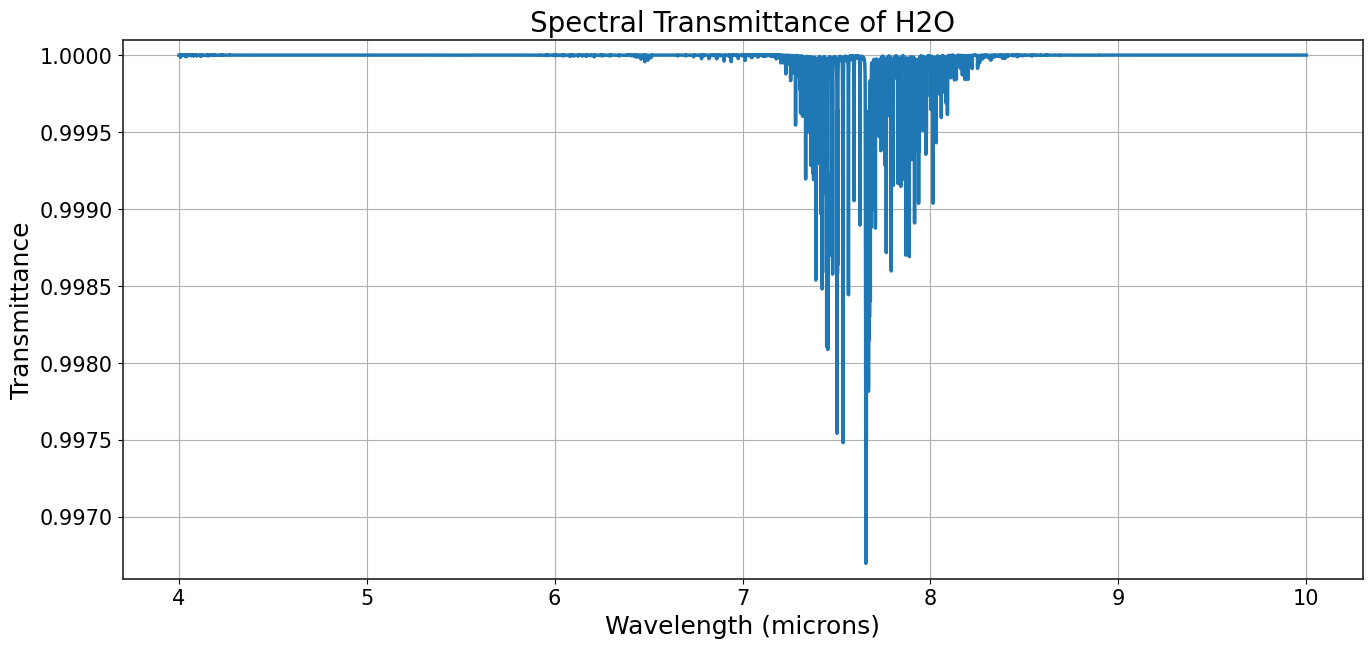

In [133]:
plot_npy(wave, tr, 'H2O')

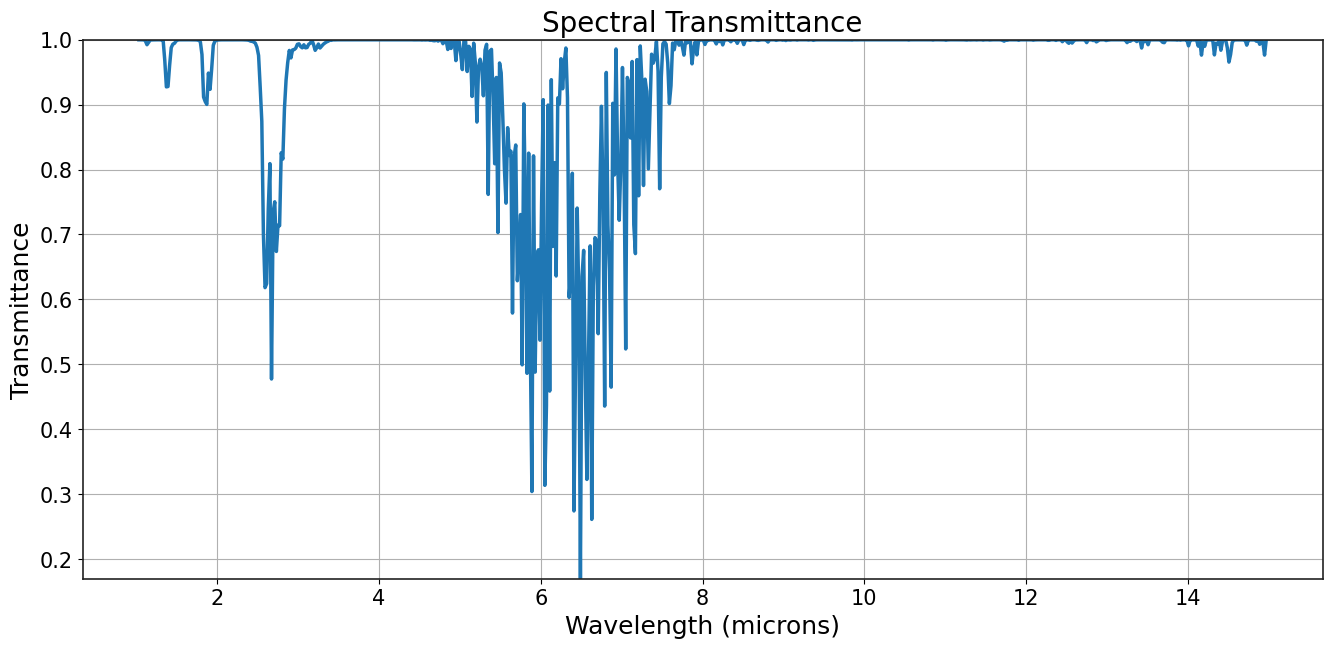

In [120]:
plot_npy(w[0], w[1])

<Axes: title={'center': 'Histogram wavelengths of '}, xlabel='Wavelength (µm)', ylabel='Frequency'>

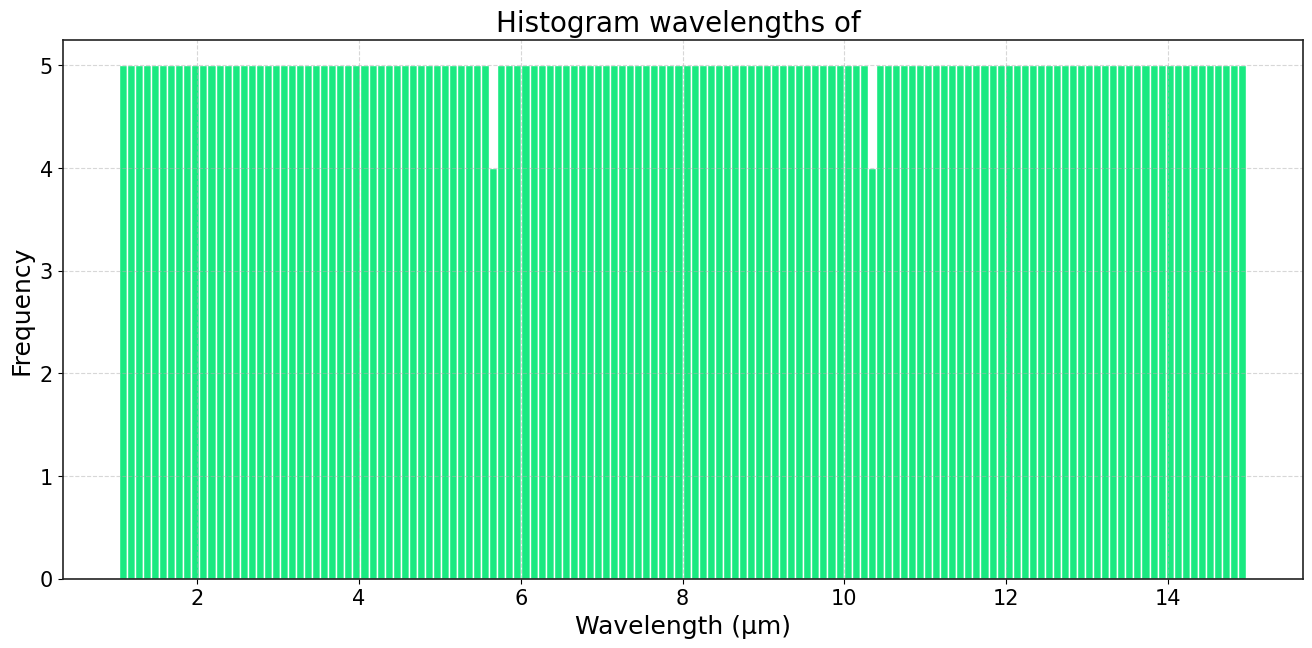

In [127]:
plot_histogram(w[0], bins = 140)